# Time evolution of reliability
Essential notation

- $A_t$ ... System is failed at time $t$
- $\overline{A}_t$ ... System is working at time $t$
- $Re(t)=\Pr(\overline{A}_t)$ ... reliability at time $t$

Definition of _failure rate_ $\lambda(t)$ (intenzita poruch)

$$
\Pr(A_{t+\Delta t} \mid \overline{A}_t) = \lambda(t) \Delta t
$$

for $\Delta t \rightarrow 0$.

Next, we recall the definition of conditional probability

$$
\Pr(A \mid B) = \frac{\Pr(A \cap B)}{\Pr(B)}
$$

and write

$$
\frac{\Pr(A_{t+\Delta t} \cap \overline{A}_t)}{\Pr(\overline{A}_t)} = \lambda(t) \Delta t
$$

<img src="./tes008.png" title="Evolution of reliability in time" style="width: 450px" align="center"/>

We observe from the figure that the above expression can be rewritten as

$$
\frac{\Delta Re(t)}{Re(t)} = -\lambda(t) \Delta t
$$

Considering $\Delta t \rightarrow 0$ we obtain

$$
\frac{dRe(t)}{Re(t)} = -\lambda(t) dt
$$

Now we solve this differential equation. The initial condition express that at the bigining we have working system, i.e. $Re(t=0)=1$. Then we integrate from this known point to general time $t$ at which the reliability is $Re(t)$

$$
\int_1^{Re(t)} \frac{1}{Re} dRe = -\int_0^t \lambda(t) dt
$$

Integrating the left-hand side we get

$$
\left[\ln(Re)\right]_{Re = 1}^{Re(t)} = -\int_0^t \lambda(t) dt
$$

Next, by substituting the integral bounds and noting that $\ln(1)=0$ we get

$$
\ln(Re(t)) = -\int_0^t \lambda(t) dt
$$

And taking exponent of both sided we get

$$
Re(t) = \exp\left(-\int_0^t \lambda(t) dt\right)
$$

For special case when $\lambda$ is constant in time, i.e. $\lambda(t) = \lambda$, this simplifies to

$$
Re(t) = \exp\left(- \lambda t \right)
$$


## Example 1
Draw the evolution of reliability when the failure rate of the system is constant $\lambda=0.1$. (Units of $\lambda$ are 1 / unit of time. You may thing of [1/year] for example.

Solution 1: Just plot $\exp(-\lambda t)$.

Solution 2: Use `scipy.integrate.odeint()` function to numerically solve $\frac{dRe(t)}{dt} = -\lambda(t) Re(t)$.

NOTE: Function `scipy.integrate.odeint()` numerically solves ODE that can be written in form $y' = f(x, y)$ and has initial condition $y(x=0)=y_0$.

Solution 3: Simulate the process: Divide time to small steps. In each step compute the probability that the system fails. Toss a virtual coint do decide whether the system failed in this step. If yes, return the time. If not, procede with next time step. (We will not cover this approach later in this lecture.)

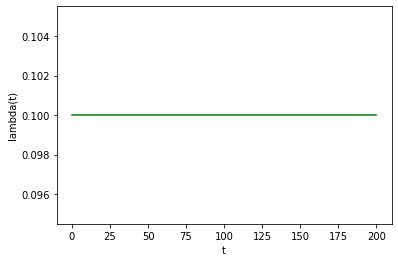

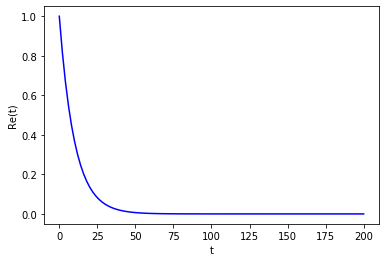

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import os
import scipy.integrate
import scipy.interpolate
import math

# Solution version 1

%matplotlib inline

# Failure rate
# This roughly means that every year there is probability 0.1
# that the system fials.
lmbda = 0.1 # Use "lmbda" because "lambda" is Python's reserved word (meaning "anonymous function"). 

# Time points
t_list = np.linspace(0, 200, 101)

def Re(t):
    return math.exp(-lmbda * t)

plt.plot(t_list, [lmbda for item in t_list], 'g', label='lambda(t)')
plt.xlabel('t')
plt.ylabel('lambda(t)')
plt.show()

plt.plot(t_list, [Re(t) for t in t_list], 'b', label='Re(t)')
plt.xlabel('t')
plt.ylabel('Re(t)')


plt.show()

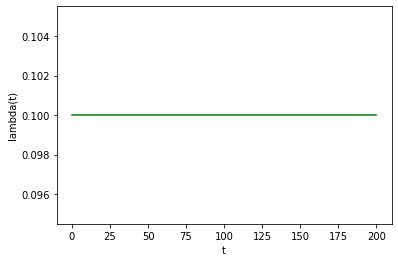

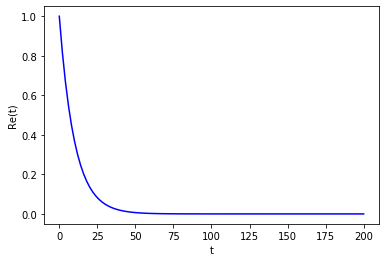

In [12]:
# Solution version 2

# Function to integrate.
# This function returns the value of the time derivative of dRe(t)/dt.
def func(re, t):
    return -lmbda*re

# Initial condition: Re(t=0)=1
re0 = 1.0

re_list = scipy.integrate.odeint(func, re0, t_list)

plt.plot(t_list, [lmbda for item in t_list], 'g', label='lambda(t)')
plt.xlabel('t')
plt.ylabel('lambda(t)')
plt.show()

plt.plot(t_list, re_list, 'b', label='Re(t)')
plt.xlabel('t')
plt.ylabel('Re(t)')
plt.show()

Ok. It looks like `scipy.integrate.odeint()` works as expected. Now we can analyze what happens if $\lambda$ evolves with time.

## Example 2
Draw the evolution of reliability when the failure rate $\lambda(t)$ is parially linear "bathtub" curve.

This correspond to three typical periods of system's lifetime

- _"infant mortality" period_ with relatively high failure rate
- standard operation period with relatively low failure rate
- _wear-out period_ with relatively high failure rate again

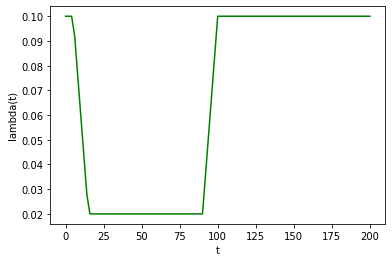

In [13]:
# Function interp1d() returns partially linear function
# which interpolates between given points. 
lambda_func = scipy.interpolate.interp1d(
    [0.0, 5.0, 15.0, 90.0, 100.0, 220.0],
    [0.1, 0.1, 0.02, 0.02, 0.1, 0.1])

# Plot the partially linear "bathtub" curve
plt.plot(t_list, [lambda_func(t) for t in t_list], 'g', label='lambda(t)')
plt.xlabel('t')
plt.ylabel('lambda(t)')
plt.show()

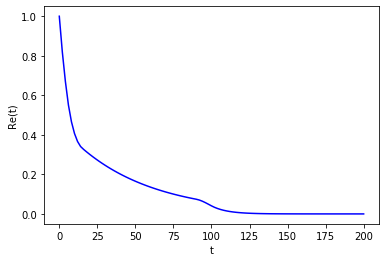

In [14]:
# Function to integrate.
# This function returns the value of the time
# derivative of dRe(t)/dt as defined by the ODE.
def func(re, t):
    return -lambda_func(t)*re

# Initial condition: Re(t=0)=1
re0 = 1.0

# Calculate Re at time points in t_list.
re_list = scipy.integrate.odeint(func, re0, t_list)

plt.plot(t_list, re_list, 'b', label='Re(t)')
plt.xlabel('t')
plt.ylabel('Re(t)')
plt.show()

## Time to failure

At the begining, the system is working. The time to its failure - also called "lifetime" - is denoted as $T$ and can be understood as a random variable.

By definition, its cumulative distribution function $F_T(t)$ is the probability that the random lifetime $T$ is less than or equl to some chosen time $t$

$$
F_T(t) = \Pr(T \le t)
$$

This probability is equal to probability that the system is (already) failed at this time.

$$
F_T(t) = \Pr(T \le t) = \Pr(A_t)
$$

The complementary event to $A_t$ is $\overline{A}_t$ which denotes that the system is working at time $t$. Recalling that probability of complementary event $\Pr(\overline{A}) = 1 - \Pr(A)$ we obtain

$$
F_T(t) = \Pr(T \le t) = \Pr(A_t) = 1 - \Pr(\overline{A}_t)
$$

The last term is indeed the reliability of the structure at time $t$ so we finally write

$$
F_T(t) = \Pr(T \le t) = \Pr(A_t) = 1 - \Pr(\overline{A}_t) = 1 - Re(t)
$$

So this means that if $Re(t)$ is funciton starting at $t=0$ from value 1 and decreasing to 0 then $F_T(t)$ is function starting at $t=0$ from value 0 and increasing to 1.

## Mean time to failure

Mean value of lifetime is, by definition, calculated as
$$
\operatorname{E}[T] = \int_{0}^{\infty}t f_T(t) dt
$$
Note, that we do not integrate from $-\infty$ but from 0. This is because the lifetime is positive random variable.

Since the PDF of $T$ is defivative of the CDF of $T$ we can write
$$
\operatorname{E}[T] = \int_{0}^{\infty}t f_T(t) dt = \int_{0}^{\infty}t \frac{dF_T(t)}{dt} dt
$$

Using the equality $F_T(t) = 1 - Re(t)$ obtained in the previous section we get
$$
\operatorname{E}[T] = \int_{0}^{\infty}t f_T(t) dt = \int_{0}^{\infty}t \frac{dF_T(t)}{dt} dt = -\int_{0}^{\infty}t \frac{dRe(t)}{dt} dt 
$$

Now integrating per partes, i.e. using the rule
$$
\int_a^b f(x) \frac{dg(x)}{dx} dx = \left[f(x)g(x)\right]_{x=a}^b-\int_a^b \frac{df(x)}{dx}g(x) dx 
$$

we get 
$$
\operatorname{E}[T] = \int_{0}^{\infty}t f_T(t) dt = \int_{0}^{\infty}t \frac{dF_T(t)}{dt} dt = -\int_{0}^{\infty}t \frac{dRe(t)}{dt} dt = -\left[t Re(t)\right]_{t=0}^{\infty} + \int_{0}^{\infty} Re(t) dt 
$$

Since the term in square brackets is zero for $t=0$ and also for $t=\infty$, we finally wirite the mean time to failure in form
$$
\operatorname{E}[T] = \int_{0}^{\infty} Re(t) dt 
$$

For constant $\lambda$ we get
$$
\operatorname{E}[T] = \int_{0}^{\infty} Re(t) dt = \int_{0}^{\infty} \exp(-\lambda t) dt = \frac{1}{\lambda}
$$



## Example 3
For the model from Example 1 calculate mean lifetime

1. analytically
2. as an average from simulated lifetimes

In [46]:
import random

lmbda = 0.1
time_step = 0.01

# Simulates lifetime
def get_random_lifetime():
    time = 0
    while True:
        if random.random()< time_step * lmbda:
            return time
        else:
            time += time_step
print(f"Time until failure = {get_random_lifetime()}")
# Re-run (Ctrl-Enter) this cell to get different lifetime. 

Time until failure = 11.91999999999979


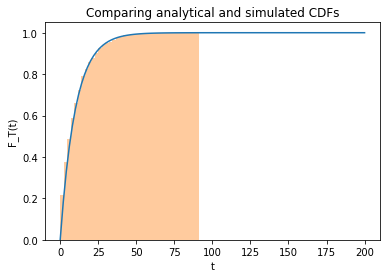

In [16]:
# Generate list of simulated lifetimes
import seaborn as sns
num_samples = 1000
T_list = [get_random_lifetime() for i in range(num_samples)]

# Plot CDF
# Recall that F_T(t) = 1 - Re(t)
# and that Re(t) = exp(-lambda * t)

def F_T(t):
    return 1-math.exp(-lmbda * t)

plt.plot(t_list, [F_T(t) for t in t_list])

# Plot histogram with kernel density line
kwargs = {'cumulative': True}
sns.distplot(T_list, hist_kws=kwargs, kde=False, norm_hist=True)
plt.xlabel('t')
plt.ylabel('F_T(t)')
plt.title("Comparing analytical and simulated CDFs")
plt.show()

In [17]:
# Calculate mean lifetime
import statistics
print(f"Analytically: E[T]={1/lmbda}")
print(f"Simulated: E[T]={statistics.mean(T_list)}")

Analytically: E[T]=10.0
Simulated: E[T]=10.403680000000081


## Example 4
Draw CDF of lifetime for model from Example 2 and compare it with simulations. Compute mean lifetime.

In [66]:
import random

time_step = 0.01

def get_random_lifetime():
    time = 0
    while True:
        if random.random()< time_step * lambda_func(time):
            return time
        else:
            time += time_step
            
print(f"Time until failure = {get_random_lifetime()}")
# Re-run (Ctrl-Enter) this cell to get different lifetime.

Time until failure = 20.40000000000039


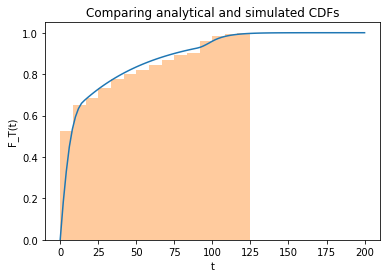

In [21]:
# Generate list of simulated lifetimes
import seaborn as sns
num_samples = 500
T_list = [get_random_lifetime() for i in range(num_samples)]

# Plot CDF
# Recall that F_T(t) = 1 - Re(t)
# and that Re(t) = exp(-lambda * t)

plt.plot(t_list, [1-re for re in re_list])

# Plot histogram with kernel density line
kwargs = {'cumulative': True}
sns.distplot(T_list, hist_kws=kwargs, kde=False, norm_hist=True)
plt.xlabel('t')
plt.ylabel('F_T(t)')
plt.title("Comparing analytical and simulated CDFs")
plt.show()

In [22]:
# Mean lifetime
print(f"Analytically computed E[T] = {statistics.mean(T_list)}")

Analytically computed E[T] = 24.988020000001566
